In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('02-insurance-linear-regression')
jovian.set_colab_id('1THU7dHVktnkU8yCokZGRdPYkXYCvf74X')

# Insurance cost prediction using linear regression

#### About Health Insurance : 

Health insurance is a type of insurance coverage that typically pays for medical, surgical, prescription drug and sometimes dental expenses incurred by the insured. Health insurance can reimburse the insured for expenses incurred from illness or injury, or pay the care provider directly.

**To know more refer the given link** : (https://www.investopedia.com/terms/h/healthinsurance.asp)

#### Dataset :

The dataset for this problem is taken from kaggle.

**Link :** [Insurance Cost Prediction](https://www.kaggle.com/mirichoi0218/insurance)

#### Objective :

In this notebook we're going to use information like a person's age, sex, BMI, no. of children and smoking habit to predict the price of yearly medical bills. This kind of model is useful for insurance companies to determine the yearly insurance premium for a person. 


#### We will create a model with the following steps:

1. Download and explore the dataset
2. Prepare the dataset for training
3. Create a linear regression model
4. Train the model to fit the data
5. Make predictions using the trained model





In [ ]:
# Uncomment and run the appropriate command for your operating system, if required

# Linux / Binder
# !pip install numpy matplotlib pandas torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# Windows
# !pip install numpy matplotlib pandas torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# MacOS
# !pip install numpy matplotlib pandas torch torchvision torchaudio

In [ ]:
import torch
import jovian
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [ ]:
project_name='02-insurance-linear-regression' # will be used by jovian.commit

## Step 1: Download and explore the data

Let us begin by downloading the data. We'll use the `download_url` function from PyTorch to get the data as a CSV (comma-separated values) file. 

In [ ]:
DATASET_URL = "https://hub.jovian.ml/wp-content/uploads/2020/05/insurance.csv"
DATA_FILENAME = "insurance.csv"
download_url(DATASET_URL, '.')

To load the dataset into memory, we'll use the `read_csv` function from the `pandas` library. The data will be loaded as a Pandas dataframe. See this short tutorial to learn more: https://data36.com/pandas-tutorial-1-basics-reading-data-files-dataframes-data-selection/

In [ ]:
dataframe_raw = pd.read_csv(DATA_FILENAME)
dataframe_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We're going to do a slight customization of the data, so that in the future if others want to use this code so every person gets a slightly different version of the dataset. Fill in your name below as a string (enter at least 5 characters)

In [ ]:
your_name = 'Astha' # at least 5 characters

The `customize_dataset` function will customize the dataset slightly using your name as a source of random numbers.

In [ ]:
def customize_dataset(dataframe_raw, rand_str):
    dataframe = dataframe_raw.copy(deep=True)
    # drop some rows
    dataframe = dataframe.sample(int(0.95*len(dataframe)), random_state=int(ord(rand_str[0])))
    # scale input
    dataframe.bmi = dataframe.bmi * ord(rand_str[1])/100.
    # scale target
    dataframe.charges = dataframe.charges * ord(rand_str[2])/100.
    # drop column
    if ord(rand_str[3]) % 2 == 1:
        dataframe = dataframe.drop(['region'], axis=1)
    return dataframe

In [ ]:
dataframe = customize_dataset(dataframe_raw, your_name)
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
27,55,female,37.69125,2,no,northwest,14231.613410
752,64,male,43.59075,0,no,northwest,16484.221702
1258,55,male,43.37225,3,no,northwest,34873.753438
384,44,male,25.45525,2,no,northeast,9630.941354
406,33,female,27.95650,0,no,southeast,4854.713564


Let us answer some basic questions about the dataset. 


**Q: How many rows does the dataset have?**

In [ ]:
num_rows = dataframe.shape[0]
print(num_rows)

1271


**Q: How many columns does the dataset have?**

In [ ]:
num_cols = dataframe.shape[1]
print(num_cols)

7


**Q: What are the column titles of the input variables?**

In [ ]:
input_cols =dataframe.drop("charges",axis=1).columns         
input_cols

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

**Q: Which of the input columns are non-numeric or categorial variables ?**



In [ ]:
categorical_cols =['sex','smoker','region'] 
categorical_cols

['sex', 'smoker', 'region']

**Q: What are the column titles of output/target variable(s)?**

In [ ]:
output_cols = ['charges']
output_cols

['charges']

**Q: What is the minimum, maximum and average value of the `charges` column? Let's show the distribution of values in a graph**
 data visualization cheatsheet for referece: https://jovian.ml/aakashns/dataviz-cheatsheet

<Figure size 720x576 with 0 Axes>

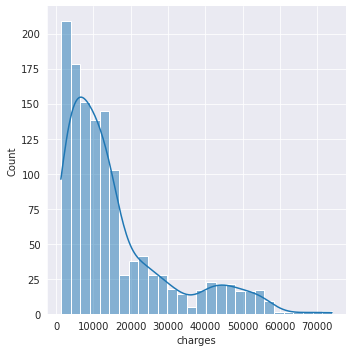

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

plt.figure(figsize=(10,8))
sns.displot(dataframe.charges, kde=True);

In [ ]:
dataframe.charges.describe()

count     1271.000000
mean     15420.162249
std      14097.842146
min       1301.373724
25%       5473.882008
50%      10893.961360
75%      19535.174845
max      73973.696492
Name: charges, dtype: float64

**Lets check if there is any null values peresent in the datatset.**

In [ ]:
dataframe.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

commiting notebook to Jovian after every step, so that I don't lose my work.

In [ ]:
!pip install jovian --upgrade -q


In [ ]:
import jovian

In [ ]:
jovian.commit(project='02-insurance-linear-regression')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/astha1998/02-insurance-linear-regression


'https://jovian.ai/astha1998/02-insurance-linear-regression'

## Step 2: Prepare the dataset for training

We need to convert the data from the Pandas dataframe into a PyTorch tensors for training. To do this, the first step is to convert it numpy arrays. The following function will perform the conversion to numpy arrays.

In [ ]:

def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

Read through the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html) to understand how we're converting categorical variables into numbers.

In [ ]:
inputs_array, targets_array = dataframe_to_arrays(dataframe)
inputs_array, targets_array

(array([[55.     ,  0.     , 37.69125,  2.     ,  0.     ,  1.     ],
        [64.     ,  1.     , 43.59075,  0.     ,  0.     ,  1.     ],
        [55.     ,  1.     , 43.37225,  3.     ,  0.     ,  1.     ],
        ...,
        [56.     ,  1.     , 29.82525,  0.     ,  0.     ,  0.     ],
        [18.     ,  0.     , 34.85075,  0.     ,  0.     ,  0.     ],
        [43.     ,  1.     , 29.9345 ,  0.     ,  0.     ,  0.     ]]),
 array([[14231.61341 ],
        [16484.221702],
        [34873.753438],
        ...,
        [12951.884474],
        [ 2556.333702],
        [ 7931.347692]]))

 Converting the numpy arrays `inputs_array` and `targets_array` into PyTorch tensors. Make sure that the data type is `torch.float32`.

In [ ]:
inputs = torch.tensor(inputs_array).type(torch.float32)
targets = torch.tensor(targets_array).type(torch.float32)


In [ ]:
inputs.dtype, targets.dtype

(torch.float32, torch.float32)

Next, we need to create PyTorch datasets & data loaders for training & validation. We'll start by creating a `TensorDataset`.

In [ ]:
dataset = TensorDataset(inputs, targets)

 selecting a number between `0.1` and `0.2` to determine the fraction of data that will be used for creating the validation set. Then will use `random_split` to create training & validation datasets.

In [ ]:
val_percent = 0.15 # between 0.1 and 0.2
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size


train_ds, val_ds = random_split(dataset, [train_size, val_size]) # Use the random_split function to split dataset into 2 parts of the desired length
len(train_ds), len(val_ds)

(1081, 190)

Finally, we can create data loaders for training & validation.

selecting a batch size for the data loader.

In [ ]:
batch_size = 5


In [ ]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

Let's look at a batch of data to verify everything is working fine so far.

In [ ]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[36.0000,  0.0000, 25.9900,  2.0000,  1.0000,  3.0000],
        [22.0000,  0.0000, 31.1650,  0.0000,  0.0000,  3.0000],
        [49.0000,  1.0000, 41.2390,  0.0000,  0.0000,  2.0000],
        [18.0000,  0.0000, 43.8955,  0.0000,  0.0000,  2.0000],
        [21.0000,  1.0000, 42.3775,  0.0000,  0.0000,  2.0000]])
targets: tensor([[21585.5840],
        [ 2499.0588],
        [ 9424.3135],
        [ 1892.7352],
        [ 1779.7932]])


Let's save our work by committing to Jovian.

In [ ]:
jovian.commit(project='02-insurance-linear-regression', environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ai/astha1998/02-insurance-linear-regression


'https://jovian.ai/astha1998/02-insurance-linear-regression'

## Step 3: Create a Linear Regression Model

Our model itself is a fairly straightforward linear regression. 


In [ ]:
input_size = len(input_cols)
output_size = len(output_cols)
input_size, output_size

(6, 1)

 Definig class below by filling out the constructor (`__init__`), `forward`, `training_step` and `validation_step` methods.



In [ ]:
class InsuranceModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)              
        
    def forward(self, xb):
        out = self.linear(xb)                           
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.l1_loss(out, targets)                         
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.l1_loss(out, targets)                                                      
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

Let us create a model using the `InsuranceModel` class. we may need to come back later and re-run the next cell to reinitialize the model, in case the loss becomes `nan` or `infinity`.

In [ ]:
model = InsuranceModel()

Let's check out the weights and biases of the model using `model.parameters`.

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.2191, -0.1761, -0.0393,  0.1294,  0.2058,  0.4035]],
        requires_grad=True), Parameter containing:
 tensor([0.1017], requires_grad=True)]

One final commit before we train the model.

In [ ]:
jovian.commit(project=project_name, environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ai/astha1998/02-insurance-linear-regression


'https://jovian.ai/astha1998/02-insurance-linear-regression'

## Step 4: Train the model to fit the data

To train our model, we'll use the `fit` function. the benefit of defining a generic training loop - you can use it for any problem.

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

**Q: Using the `evaluate` function to calculate the loss on the validation set before training.**

In [ ]:
result = evaluate(model, val_loader) # Use the the evaluate function
print(result)


{'val_loss': 13579.2490234375}



We are now ready to train the model. we may need to run the training loop many times, for different number of epochs and with different learning rates, to get a good result. Also, if our loss becomes too large (or `nan`), we may have to re-initialize the model by running the cell `model = InsuranceModel()`.

**Training the model 4-5 times with different learning rates & for different number of epochs.**
Varying learning rates by orders of 10 (e.g. `1e-2`, `1e-3`, `1e-4`, `1e-5`, `1e-6`) to figure out what works.

In [ ]:
epochs = 200
lr = 1e-4
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 12368.1436
Epoch [40], val_loss: 11193.9033
Epoch [60], val_loss: 10192.1094
Epoch [80], val_loss: 9398.5068
Epoch [100], val_loss: 8746.6924
Epoch [120], val_loss: 8228.6221
Epoch [140], val_loss: 7864.6440
Epoch [160], val_loss: 7598.6704
Epoch [180], val_loss: 7403.8848
Epoch [200], val_loss: 7275.5635


In [ ]:
epochs = 500
lr = 1e-3
history2 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 6981.3545
Epoch [40], val_loss: 6910.2896
Epoch [60], val_loss: 6826.1699
Epoch [80], val_loss: 6740.9829
Epoch [100], val_loss: 6657.0098
Epoch [120], val_loss: 6580.8149
Epoch [140], val_loss: 6507.8130
Epoch [160], val_loss: 6435.2021
Epoch [180], val_loss: 6363.6157
Epoch [200], val_loss: 6298.6338
Epoch [220], val_loss: 6245.1890
Epoch [240], val_loss: 6201.2671
Epoch [260], val_loss: 6162.4805
Epoch [280], val_loss: 6133.1123
Epoch [300], val_loss: 6112.1265
Epoch [320], val_loss: 6095.1704
Epoch [340], val_loss: 6082.8008
Epoch [360], val_loss: 6075.7793
Epoch [380], val_loss: 6068.2759
Epoch [400], val_loss: 6063.8535
Epoch [420], val_loss: 6063.1377
Epoch [440], val_loss: 6060.4839
Epoch [460], val_loss: 6057.9683
Epoch [480], val_loss: 6057.2056
Epoch [500], val_loss: 6055.7515


In [ ]:
epochs = 500
lr = 1e-1
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 6025.8652
Epoch [40], val_loss: 5974.9712
Epoch [60], val_loss: 5921.3140
Epoch [80], val_loss: 5879.7749
Epoch [100], val_loss: 5904.0347
Epoch [120], val_loss: 5862.8037
Epoch [140], val_loss: 5832.0249
Epoch [160], val_loss: 5834.3643
Epoch [180], val_loss: 5822.8018
Epoch [200], val_loss: 5763.6665
Epoch [220], val_loss: 5760.2700
Epoch [240], val_loss: 5730.2842
Epoch [260], val_loss: 5782.8203
Epoch [280], val_loss: 5696.4751
Epoch [300], val_loss: 5694.6641
Epoch [320], val_loss: 5685.1953
Epoch [340], val_loss: 5677.1860
Epoch [360], val_loss: 5635.2095
Epoch [380], val_loss: 5621.6909
Epoch [400], val_loss: 5650.5039
Epoch [420], val_loss: 5600.6890
Epoch [440], val_loss: 5584.1890
Epoch [460], val_loss: 5588.8838
Epoch [480], val_loss: 5737.1987
Epoch [500], val_loss: 5636.3062


In [ ]:
epochs = 500
lr = 0.5
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 6077.8530
Epoch [40], val_loss: 5888.4624
Epoch [60], val_loss: 5381.8843
Epoch [80], val_loss: 5420.6714
Epoch [100], val_loss: 5335.0703
Epoch [120], val_loss: 5481.0098
Epoch [140], val_loss: 5549.0073
Epoch [160], val_loss: 5205.3745
Epoch [180], val_loss: 5146.6655
Epoch [200], val_loss: 4820.7583
Epoch [220], val_loss: 5221.7466
Epoch [240], val_loss: 5614.5117
Epoch [260], val_loss: 4992.0210
Epoch [280], val_loss: 5062.5840
Epoch [300], val_loss: 5464.6450
Epoch [320], val_loss: 4729.0391
Epoch [340], val_loss: 4541.5161
Epoch [360], val_loss: 4861.8760
Epoch [380], val_loss: 4660.1343
Epoch [400], val_loss: 4796.8071
Epoch [420], val_loss: 4461.0039
Epoch [440], val_loss: 3989.6243
Epoch [460], val_loss: 4692.2515
Epoch [480], val_loss: 3884.3379
Epoch [500], val_loss: 4840.7251


In [ ]:
epochs = 500
lr = 1e-2
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [20], val_loss: 3733.8269
Epoch [40], val_loss: 3731.2976
Epoch [60], val_loss: 3728.4045
Epoch [80], val_loss: 3730.8914
Epoch [100], val_loss: 3729.9836
Epoch [120], val_loss: 3726.7859
Epoch [140], val_loss: 3729.1431
Epoch [160], val_loss: 3725.9717
Epoch [180], val_loss: 3726.8000
Epoch [200], val_loss: 3726.3347
Epoch [220], val_loss: 3724.0942
Epoch [240], val_loss: 3725.4639
Epoch [260], val_loss: 3724.4116
Epoch [280], val_loss: 3727.6443
Epoch [300], val_loss: 3729.3745
Epoch [320], val_loss: 3726.0073
Epoch [340], val_loss: 3726.3433
Epoch [360], val_loss: 3729.5884
Epoch [380], val_loss: 3729.2134
Epoch [400], val_loss: 3720.4873
Epoch [420], val_loss: 3718.3438
Epoch [440], val_loss: 3723.4639
Epoch [460], val_loss: 3719.3083
Epoch [480], val_loss: 3724.1123
Epoch [500], val_loss: 3714.4038


**Q: What is the final validation loss of your model?**

In [ ]:
val_loss = 3714.4038

Let's log the final validation loss to Jovian and commit the notebook

In [ ]:
jovian.log_metrics(val_loss=val_loss)

[jovian] Metrics logged.


In [ ]:
jovian.commit(project=project_name, environment=None)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ai/astha1998/02-insurance-linear-regression


'https://jovian.ai/astha1998/02-insurance-linear-regression'

## Step 5: Make predictions using the trained model

**  function definition to make predictions on a single input**

In [ ]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)                
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [ ]:
input, target = val_ds[0]
predict_single(input, target, model)

Input: tensor([54.0000,  1.0000, 37.6912,  0.0000,  0.0000,  0.0000])
Target: tensor([12104.6758])
Prediction: tensor([12453.8877])


In [ ]:
input, target = val_ds[10]
predict_single(input, target, model)

Input: tensor([22.0000,  1.0000, 38.8355,  0.0000,  0.0000,  2.0000])
Target: tensor([1942.5735])
Prediction: tensor([2345.0339])


In [ ]:
input, target = val_ds[23]
predict_single(input, target, model)

Input: tensor([48.0000,  0.0000, 37.1450,  2.0000,  0.0000,  0.0000])
Target: tensor([11650.1689])
Prediction: tensor([12049.2949])


#### **Conclusion**

In this notebook, we have explored the basics of the linear regression model and applied it to predict insuranc charges and seen differnece between predicted and actual results.

In [ ]:
jovian.commit(project=project_name, environment=None)
jovian.commit(project=project_name, environment=None) # try again, kaggle fails sometimes

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ai/astha1998/02-insurance-linear-regression
[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ai/astha1998/02-insurance-linear-regression


'https://jovian.ai/astha1998/02-insurance-linear-regression'